In [64]:
from eeg import load_data


df = load_data()
df.describe()
df.head()

/Users/oreogundipe/lab/eeg-restingstate-days
[PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/focus_1674926222.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/powerByBand_1674886663.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/powerByBand_1674748330.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/calm_1674495760.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/signalQuality_1675142192.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/signalQuality_1674630344.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/signalQuality_1675054666.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/powerByBand_1674336341.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/calm_1675187274.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/signalQuality_1674325610.json'), PosixPath('/Users/oreogundipe/lab/eeg-restingstate-days/signalQuality_1675120167.json'), PosixPa

/Users/oreogundipe/lab/fusion/analysis/eeg.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/Users/oreogundipe/lab/fusion/analysis/eeg.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/Users/oreogundipe/lab/fusion/analysis/eeg.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/Users/oreogundipe/lab/fusion/analysis/eeg.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(result, ignore_index=True)
/Users/oreogundipe/lab/fusion/analysis/eeg.py:30: FutureWarning: The frame.append method is 

,timestamp,local_date,local_timeofday,duration,avg_power_per_channel_by_band,avg_power_by_band,avg_power_by_channel,avg_calm_score,avg_focus_score,time_spent_calm,time_spent_focused
0,1674239692,2023-01-20 10:34,morning,0 days 00:10:00,"{'C4': {'theta': 1.7732591187674052, 'alpha': ...","{'delta': 6.237515668642202, 'theta': 5.759423...","{'C4': 1.1797987275304676, 'PO4': 2.3595464410...",0.408773,0.601004,0.921824,0.993485
1,1674273748,2023-01-20 20:02,evening,0 days 00:10:00,"{'C4': {'theta': 3.977340050592043, 'alpha': 2...","{'delta': 4.5196214429280985, 'theta': 3.91078...","{'C4': 2.5035806500051816, 'PO4': 2.4417606690...",0.374374,0.447965,0.817590,0.833876
2,1674322177,2023-01-21 09:29,morning,0 days 00:02:15,"{'C4': {'theta': 20.06846966055921, 'alpha': 1...","{'delta': 20.59651052956927, 'theta': 18.46297...","{'C4': 12.22726201586139, 'PO4': 9.43993818481...",0.196035,0.471124,0.376812,0.898551
3,1674325611,2023-01-21 10:26,morning,0 days 00:09:53,"{'C4': {'theta': 9.227736480957427, 'alpha': 5...","{'delta': 11.245835527847916, 'theta': 9.32280...","{'C4': 5.96199170002459, 'PO4': 1.757748117585...",0.377936,0.585194,0.802439,0.929268
4,1674336342,2023-01-21 13:25,afternoon,0 days 00:09:32,"{'C4': {'theta': 188.2143565322953, 'alpha': 9...","{'delta': 253.8771668656203, 'theta': 211.9358...","{'C4': 111.94446038695136, 'PO4': 146.47904301...",0.330593,0.503524,0.699659,0.955631


In [69]:
import pandas as pd
import json
import matplotlib.pyplot as plt

def get_df_for_period(df, period):
    df_period = df[df["local_timeofday"] == period]
    df_period.reset_index(inplace=True)
    df_period.drop(columns=["index"], inplace=True)
    return df_period

def plot_values_for_period(df, period):

    df_period = get_df_for_period(df, period)

    # plot power across channels
    plot_power_by_channel(df_period)
    # plot power across bands
    plot_power_by_band(df_period)

def plot_power_by_channel(df_period):
    # extract the values from the JSON column using json_normalize
    power_by_channel = pd.concat([df_period[['timestamp']], pd.json_normalize(df_period['avg_power_by_channel'])], axis=1)

    # plot the values using matplotlib
    channels = ['PO3', 'PO4', 'CP3', 'CP4']
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Power')
    for channel in channels:
        ax.plot(power_by_channel['timestamp'], power_by_channel[channel], label=channel)
    plt.legend()
    plt.show()

    print(power_by_channel)
def plot_power_by_band(df_period):
    # extract the values from the JSON column using json_normalize
    power_by_band = pd.concat([df_period[['timestamp']], pd.json_normalize(df_period['avg_power_by_band'])], axis=1)

    # plot power across bands
    bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Power')
    for band in bands:
        ax.plot(power_by_band['timestamp'], power_by_band[band], label=band)

    plt.legend()
    plt.show()

    print(power_by_band)


# there's one more avg_power_per_channel_by_band - good for comparing assymetry

<ipython-input-69-e7a45bb4de41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=["index"], inplace=True)


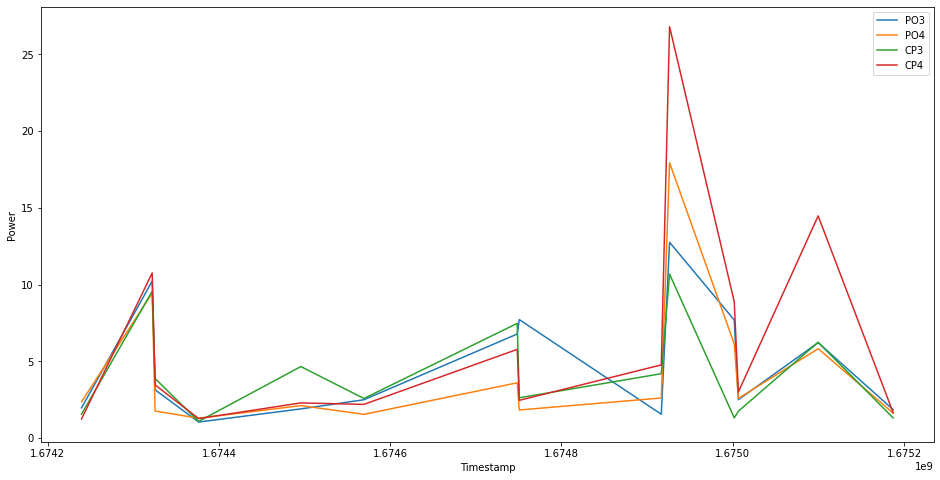

     timestamp         C4        PO4        CP3        PO3         C3  \
0   1674239692   1.179799   2.359546   1.551885   1.965801   1.008697   
1   1674322177  12.227262   9.439938   9.561995  10.227976  13.319473   
2   1674325611   5.961992   1.757748   3.873791   3.138525  11.336653   
3   1674376427   1.959332   1.292339   1.085679   1.042079  11.629459   
4   1674495760   1.810596   2.112984   4.656726   1.897430   2.110511   
5   1674569355  40.971182   1.541807   2.577690   2.494130   1.855115   
6   1674748331   3.474103   3.596891   7.471776   6.777089   3.058293   
7   1674750808   2.166027   1.826871   2.621670   7.717185  16.778095   
8   1674916544   5.891493   2.609639   4.191707   1.550071   2.451768   
9   1674926224  37.922894  17.936929  10.681366  12.757764  82.650732   
10  1675001726   7.163976   6.137236   1.314819   7.692907   3.806050   
11  1675006570   2.698426   2.581447   1.749496   2.500874   3.616965   
12  1675099688  31.606351   5.822843   6.241531   6

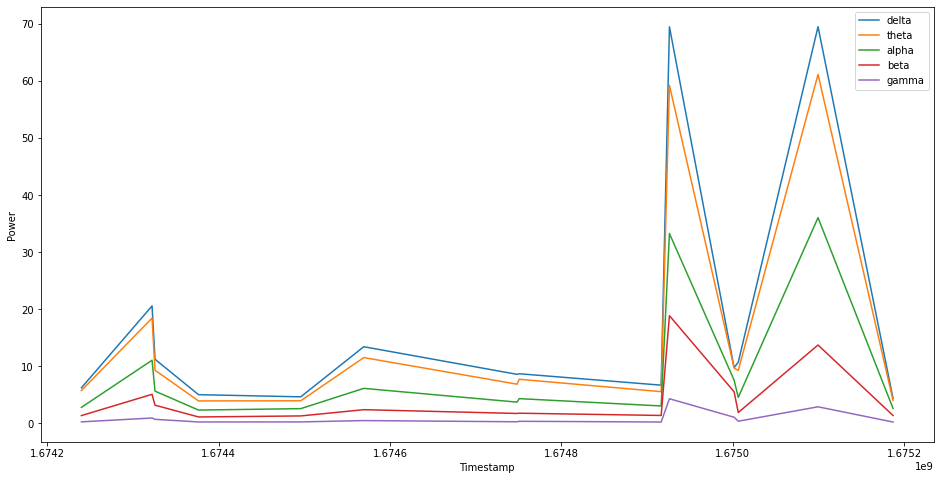

     timestamp      delta      theta      alpha       beta     gamma
0   1674239692   6.237516   5.759423   2.810702   1.371595  0.270815
1   1674322177  20.596511  18.462979  11.075959   5.098438  0.945718
2   1674325611  11.245836   9.322803   5.661928   3.196113  0.717345
3   1674376427   5.040356   3.942792   2.339200   1.131136  0.253086
4   1674495760   4.659650   3.963674   2.588186   1.310522  0.262215
5   1674569355  13.442967  11.539111   6.143679   2.405888  0.497100
6   1674748331   8.602500   6.877374   3.729905   1.745636  0.286670
7   1674750808   8.706182   7.739006   4.342986   1.788540  0.370304
8   1674916544   6.704866   5.566848   3.061267   1.394205  0.246239
9   1674926224  69.523392  59.259804  33.284728  18.882234  4.323006
10  1675001726   9.772722   9.712089   7.574013   5.543769  1.079464
11  1675006570  10.724029   9.285207   4.566783   1.904634  0.382504
12  1675099688  69.548424  61.184278  36.076830  13.744810  2.911418
13  1675187274   4.373970   4.0288

In [70]:
plot_values_for_period(df, "morning")

<ipython-input-69-e7a45bb4de41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period.drop(columns=["index"], inplace=True)


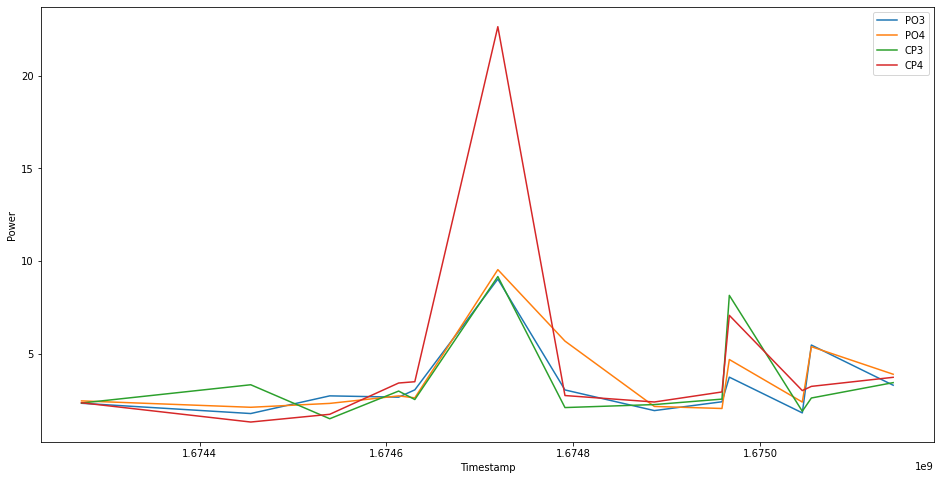

     timestamp         C4       PO4       CP3       PO3          C3  \
0   1674273748   2.503581  2.441761  2.325578  2.313498    3.243131   
1   1674454791   3.048316  2.096891  3.313912  1.758672    2.138177   
2   1674539318   4.968837  2.306621  1.477652  2.713273    4.777720   
3   1674613053   4.803467  2.711677  2.972653  2.643356    7.971269   
4   1674630346   2.597376  2.606315  2.515749  3.037257    2.220798   
5   1674719195  20.843612  9.535272  9.162481  9.025092  385.541129   
6   1674791020   7.219431  5.673219  2.081108  3.034121    2.176595   
7   1674886664   3.305273  2.141413  2.243435  1.917728    2.593753   
8   1674959010   4.797763  2.031596  2.537746  2.394566    2.408438   
9   1674966880  10.507915  4.678020  8.144145  3.724436   29.810463   
10  1675044969   2.290504  2.379044  1.882211  1.793684    3.479957   
11  1675054667   6.024630  5.370773  2.597869  5.459907    3.085497   
12  1675142192   6.914765  3.882193  3.427779  3.288383    2.204543   

     

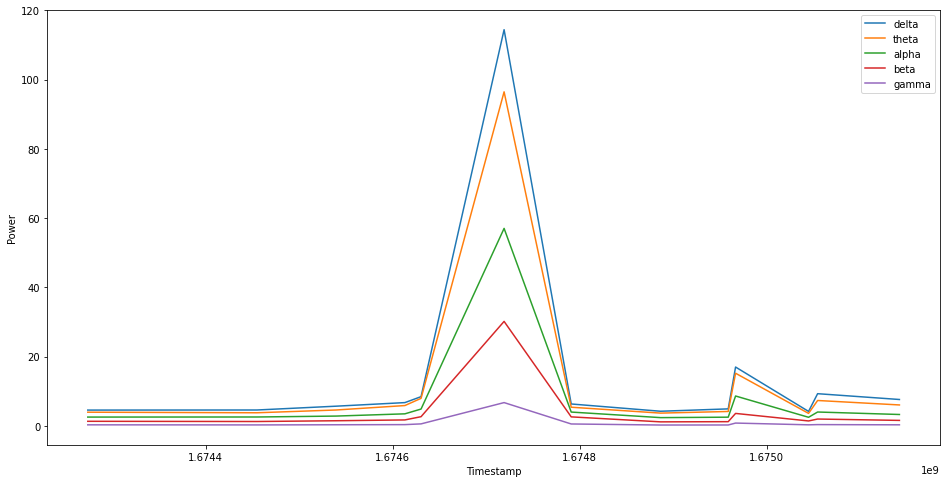

     timestamp       delta      theta      alpha       beta     gamma
0   1674273748    4.519621   3.910780   2.500023   1.280132  0.260435
1   1674454791    4.545193   3.745288   2.524497   1.219683  0.233923
2   1674539318    5.644775   4.542847   2.788915   1.439396  0.281776
3   1674613053    6.681290   5.830014   3.437546   1.675904  0.320389
4   1674630346    8.398766   7.910572   4.820240   2.614282  0.533879
5   1674719195  114.411716  96.456795  57.006076  30.140063  6.683262
6   1674791020    6.283281   5.346671   3.947831   2.559291  0.509017
7   1674886664    4.182628   3.645626   2.341604   1.119498  0.201858
8   1674959010    4.867557   4.119255   2.472581   1.173123  0.215683
9   1674966880   16.956771  15.163137   8.587278   3.556456  0.767940
10  1675044969    4.138442   3.568055   2.440326   1.380150  0.263918
11  1675054667    9.255643   7.291588   3.961356   1.934925  0.326244
12  1675142192    7.579086   6.003376   3.246344   1.539567  0.265067


In [71]:
plot_values_for_period(df, "evening")

In [ ]:

- time spent in focus/calm states should also be split (low, med, high)

- okay, so we deffo want to use the signal quality predicitions to filter out.
    - manually what I was doing was checking the %good , %bad, %great .... we need this per channel.

- use the median scores instead of the mean

- there's one more avg_power_per_channel_by_band - good for comparing assymetry

in reading the charts top of mind questions
- what are the peaks (noise? or something else?)
- check time with subjective description
- also want to pair with other signals (sleep, workload etc)

In [ ]:
Some notes:
- Sub sampling the eeg to 5secs and generating metrics for it
    - allow for a timeline view for comparing sets of recordings